In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
app=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16516 non-null  object 
 1   Category             16516 non-null  object 
 2   Rating               16516 non-null  float64
 3   Reviews              16516 non-null  int64  
 4   Size                 16516 non-null  object 
 5   Price                16516 non-null  object 
 6   Content_Rating       16516 non-null  object 
 7   Last_Updated_On      16516 non-null  object 
 8   Release_Version      16516 non-null  object 
 9   OS_Version_Required  16516 non-null  object 
 10  Downloads            16516 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


In [4]:
app.drop(['Offered_By','Category','Size','Last_Updated_On','Release_Version','OS_Version_Required'],axis=1,inplace=True)

In [5]:
app.replace(to_replace=['10+','Free','Adults only 18+'],value=0,inplace=True)
app.replace(to_replace=['50+','Everyone'],value=1,inplace=True)
app.replace(to_replace=['100+','Everyone 10+'],value=2,inplace=True)
app.replace(to_replace=['500+','Mature 17+'],value=3,inplace=True)
app.replace(to_replace=['1,000+','Teen'],value=4,inplace=True)
app.replace(to_replace=['5,000+','Unrated'],value=5,inplace=True)
app.replace(to_replace=['10,000+'],value=6,inplace=True)
app.replace(to_replace=['50,000+'],value=7,inplace=True)
app.replace(to_replace=['100,000+'],value=8,inplace=True)
app.replace(to_replace=['500,000+'],value=9,inplace=True)
app.replace(to_replace=['1,000,000+'],value=10,inplace=True)
app.replace(to_replace=['5,000,000+'],value=11,inplace=True)
app.replace(to_replace=['10,000,000+'],value=12,inplace=True)
app.replace(to_replace=['50,000,000+'],value=13,inplace=True)
app.replace(to_replace=['100,000,000+'],value=14,inplace=True)
app.replace(to_replace=['500,000,000+'],value=15,inplace=True)
app.replace(to_replace=['1,000,000,000+'],value=16,inplace=True)
app.replace(to_replace=['5,000,000,000+'],value=17,inplace=True)

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          16516 non-null  float64
 1   Reviews         16516 non-null  int64  
 2   Price           16516 non-null  object 
 3   Content_Rating  16516 non-null  int64  
 4   Downloads       16516 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 645.3+ KB


In [7]:
app['Price'].value_counts()

0           15450
222.9942      184
73.8342       163
148.4142      153
372.1542      120
            ...  
111.87          1
335.61          1
469.1082        1
74.58           1
801.735         1
Name: Price, Length: 83, dtype: int64

In [8]:
app['Price']=pd.to_numeric(app['Price'])

In [9]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          16516 non-null  float64
 1   Reviews         16516 non-null  int64  
 2   Price           16516 non-null  float64
 3   Content_Rating  16516 non-null  int64  
 4   Downloads       16516 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 645.3 KB


In [10]:
app.head()

,Rating,Reviews,Price,Content_Rating,Downloads
0,4.18,1481,0.0000,1,8
1,4.81,302,0.0000,1,5
2,4.27,374,0.0000,1,6
3,4.03,122058,0.0000,4,12
4,4.60,358,297.5742,1,5


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           24776 non-null  object 
 1   Category             24776 non-null  object 
 2   Rating               24776 non-null  float64
 3   Reviews              24776 non-null  int64  
 4   Size                 24776 non-null  object 
 5   Price                24776 non-null  object 
 6   Content_Rating       24776 non-null  object 
 7   Last_Updated_On      24776 non-null  object 
 8   Release_Version      24776 non-null  object 
 9   OS_Version_Required  24776 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


In [12]:
test.drop(['Offered_By','Category','Size','Last_Updated_On','Release_Version','OS_Version_Required'],axis=1,inplace=True)

In [13]:
test.replace(to_replace=['Free','Adults only 18+'],value=0,inplace=True)
test.replace(to_replace=['Everyone'],value=1,inplace=True)
test.replace(to_replace=['Everyone 10+'],value=2,inplace=True)
test.replace(to_replace=['Mature 17+'],value=3,inplace=True)
test.replace(to_replace=['Teen'],value=4,inplace=True)
test.replace(to_replace=['Unrated'],value=5,inplace=True)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          24776 non-null  float64
 1   Reviews         24776 non-null  int64  
 2   Price           24776 non-null  object 
 3   Content_Rating  24776 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 774.4+ KB


In [15]:
test['Price']=pd.to_numeric(test['Price'])

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          24776 non-null  float64
 1   Reviews         24776 non-null  int64  
 2   Price           24776 non-null  float64
 3   Content_Rating  24776 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 774.4 KB


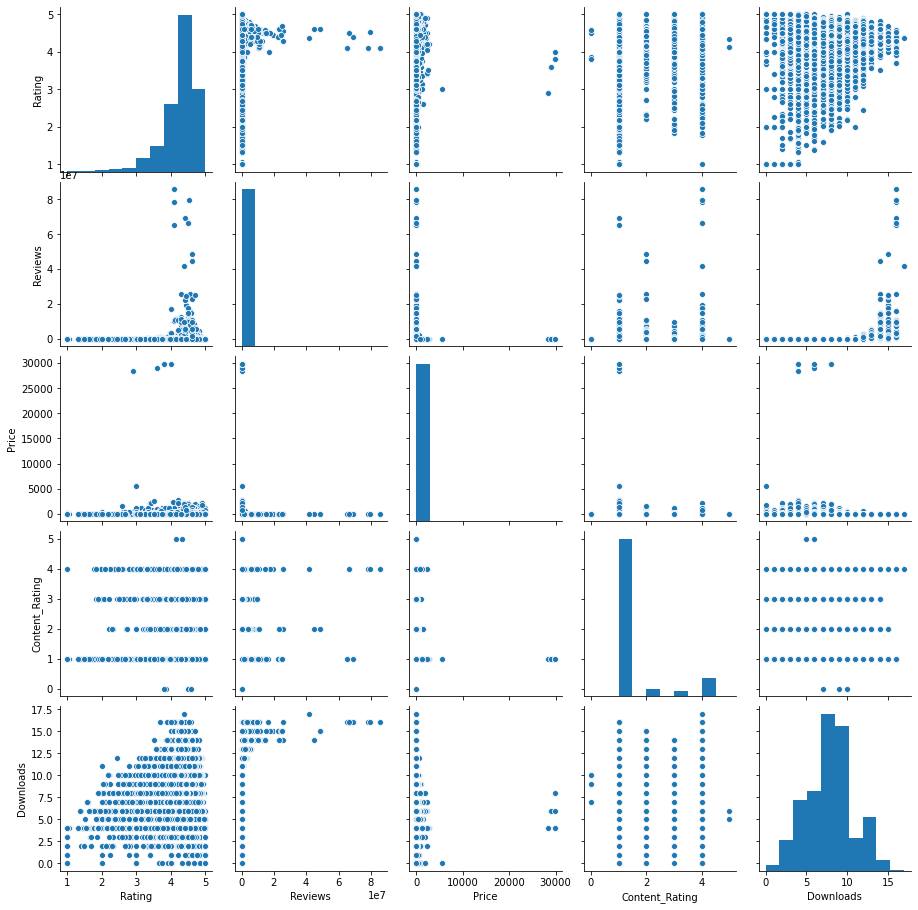

In [21]:
sns.pairplot(app)

In [17]:
X=app.drop(['Downloads'], axis=1).values
y=app['Downloads'].values

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [19]:
lin_reg=LinearRegression(fit_intercept=True)

In [20]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [21]:
print('Linear Model Coeff m:{}'.format(lin_reg.coef_))
print('Linear Model Intercept c: {}'.format(lin_reg.intercept_))

Linear Model Coeff m:[ 2.32740754e-01  3.58602659e-07 -2.47665169e-04  3.71210734e-01]
Linear Model Intercept c: 6.366477959787454


In [22]:
y_predict=lin_reg.predict(X_test)

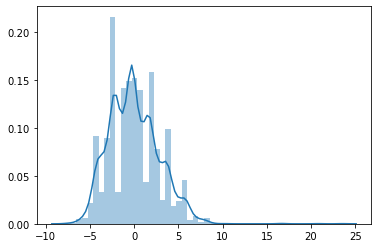

In [23]:
sns.distplot((y_predict-y_test))

In [24]:
y_predict

array([7.83528764, 7.72591688, 7.68813233, ..., 7.79708399, 7.87114154,
       7.67413023])

In [25]:
y_test

array([10, 11,  8, ...,  4,  4,  8], dtype=int64)

In [26]:
y_predict=lin_reg.predict(test)

In [28]:
y_predict

array([7.79016532, 8.85098112, 7.85470076, ..., 7.85036844, 7.92826317,
       7.66452296])

In [29]:
y_predict=y_predict.astype(int)

In [30]:
y_predict

array([7, 8, 7, ..., 7, 7, 7])

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_reg=LogisticRegression(fit_intercept=True, random_state=0)

In [33]:
log_reg.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [34]:
print(f'Logistic Coeff: {log_reg.coef_}')
print(f'Logistic constant: {log_reg.intercept_}')

Logistic Coeff: [[-2.84643783e-08 -8.34070216e-05 -2.25377030e-07 -9.03296883e-09]
 [-2.86838356e-08 -8.34066151e-05 -2.44879333e-07 -8.96741133e-09]
 [-7.15431956e-09 -8.33666653e-05  7.75299573e-08 -3.18204661e-09]
 [-1.52987034e-08 -8.33369953e-05 -8.24607869e-08 -5.09970899e-09]
 [ 2.58760395e-08 -8.28745147e-05  1.38961185e-06  7.14175333e-09]
 [ 2.99148120e-09 -8.26158156e-05  6.61118122e-08  9.12963009e-10]
 [ 7.65697833e-08 -7.50636158e-05  1.52118618e-06  2.27852265e-08]
 [ 2.65518181e-08 -7.07186769e-05  2.94681214e-08  8.43039007e-09]
 [ 1.17838856e-07  2.23795257e-05  2.82456142e-07  3.68654704e-08]
 [ 3.20888570e-08  6.38427191e-05 -1.47816221e-07  1.10431008e-08]
 [ 7.88021819e-08  6.91579874e-05 -2.55838403e-07  2.78529645e-08]
 [-1.04887944e-08  6.89433635e-05 -3.43271734e-07 -2.56761332e-09]
 [ 9.27403459e-10  7.04046696e-05 -3.38604476e-07  2.91224998e-09]
 [-4.92570891e-08  7.02854291e-05 -3.46399064e-07 -1.54484346e-08]
 [-4.97918921e-08  7.04856773e-05 -3.47496019e

In [35]:
y_predict=log_reg.predict(X_test)

In [36]:
y_predict_train=log_reg.predict(X_train)

In [59]:
y_predict=log_reg.predict_proba(test)

In [60]:
y_predict

array([[4.93475054e-02, 4.93475327e-02, 4.93502232e-02, ...,
        6.08390576e-02, 6.08539805e-02, 6.06916916e-02],
       [4.07937502e-02, 4.07938058e-02, 4.07992755e-02, ...,
        6.82992235e-02, 6.83404737e-02, 6.78926660e-02],
       [2.00864801e-12, 2.00878017e-12, 2.02181140e-12, ...,
        1.27991726e-01, 1.31777040e-01, 9.59438191e-02],
       ...,
       [5.32555896e-02, 5.32556003e-02, 5.32566680e-02, ...,
        5.75009185e-02, 5.75060853e-02, 5.74498525e-02],
       [1.76423535e-23, 1.76447061e-23, 1.78774735e-23, ...,
        1.39578958e-01, 1.48072725e-01, 7.78276572e-02],
       [4.88790814e-02, 4.88791105e-02, 4.88819799e-02, ...,
        6.12419998e-02, 6.12581799e-02, 6.10822361e-02]])

In [66]:
y_predict=np.round(y_predict,1)

In [67]:
y_predict

array([[0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
       [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
       [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
       [0. , 0. , 0. , ..., 0.1, 0.1, 0.1]])

In [68]:
y_predict.shape

(24776, 18)

In [69]:
predict=pd.DataFrame(data=y_predict)

In [70]:
predict.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [71]:
predict.to_csv('solution1.csv',index=False)